# Titanic: Machine Learning from Disaster From Kaggle
# Author: jz1g17@soton.ac.uk -> referenced by 技术世界
# with R

In [1]:
###################################################################################################

** 2 CLASS CLASSIFICATION PROBLEM **

**Loading R library**

In [2]:
library(readr) # File read / write
library(ggplot2) # Data visualization
library(ggthemes) # Data visualization
library(scales) # Data visualization
library(plyr)
library(stringr) # String manipulation
library(InformationValue) # IV / WOE calculation
library(MLmetrics) # Mache learning metrics.e.g. Recall, Precision, Accuracy, AUC
library(rpart) # Decision tree utils
library(randomForest) # Random Forest
library(dplyr) # Data manipulation
library(e1071) # SVM
library(Amelia) # Missing value utils
library(party) # Conditional inference trees
library(gbm) # AdaBoost
library(class) # KNN
library(scales)


Attaching package: 'scales'

The following object is masked from 'package:readr':

    col_factor


Attaching package: 'MLmetrics'

The following object is masked from 'package:base':

    Recall

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin


Attaching package: 'dplyr'

The following object is masked from 'package:randomForest':

    combine

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2018 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.ed

# step 1: load train and test data

In [3]:
train <- read_csv("train.csv")
test <- read_csv("test.csv")
# combine them
data <- bind_rows(train, test)
# id of trian data
train.row <- 1:nrow(train)
# id of test data
test.row <- (1 + nrow(train)):(nrow(train) + nrow(test))

Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Survived = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)
Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


In [4]:
# combined data
data

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NA,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NA,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NA,C


In [5]:
# observe the dataset
str(data)

Classes 'tbl_df', 'tbl' and 'data.frame':	1309 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


** It could find 12 varibels 1309rows data in this dataset 891 for train data and 418 for test data **

| **Variable** | **Definition** | **Key** |
 |:------ | :------ | :------ |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |  |
| Age | Age in years |  |
| sibsp | # of siblings / spouses aboard the Titanic |  |
| parch | # of parents / children aboard the Titanic |  |
| ticket | Ticket number |  |
| fare | Passenger fare |  |
| cabin | Cabin number |  |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

**It could find the data of AGE, CABIN and EMBARKED has missing value;
Name, Sex, Ticket, Cabin and Embarked are strings**

#  step 2: Anlysis the feature

# ** For Pclass, transform to factor type varaible and check the relationship between survivor and Pclass**

In [6]:
data$Survived <- factor(data$Survived)

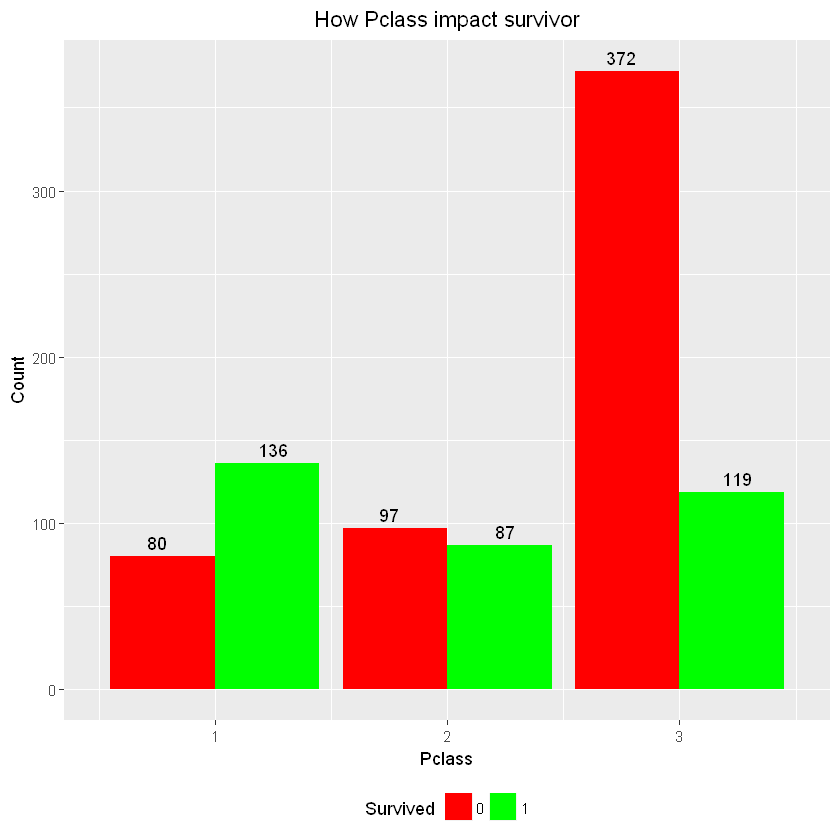

In [7]:
ggplot(data = data[1:nrow(train),], mapping = aes(x = Pclass, y = ..count.., fill=Survived)) + 
  geom_bar(stat = "count", position='dodge') + 
  xlab('Pclass') + 
  ylab('Count') + 
  ggtitle('How Pclass impact survivor') + 
  scale_fill_manual(values=c("#FF0000", "#00FF00")) +
  geom_text(stat = "count", aes(label = ..count..), position=position_dodge(width=1), , vjust=-0.5) + 
  theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")

** It could find most passergers in class 1 survivied, half in class 2, 25% in class 3
According to WOE AND IV, it could find IV of Pclass IS 0.5 AND "Highly Predictive" **

In [8]:
WOETable(X=factor(data$Pclass[1:nrow(train)]), Y=data$Survived[1:nrow(train)])

CAT,GOODS,BADS,TOTAL,PCT_G,PCT_B,WOE,IV
1,136,80,216,0.3976608,0.1457195,1.0039160,0.25292792
2,87,97,184,0.2543860,0.1766849,0.3644848,0.02832087
3,119,372,491,0.3479532,0.6775956,-0.6664827,0.21970095


In [9]:
IV(X=factor(data$Pclass[1:nrow(train)]), Y=data$Survived[1:nrow(train)])

[1] 0.5009497
attr(,"howgood")
[1] "Highly Predictive"

# ** For Name, find relationship between survived and titles **

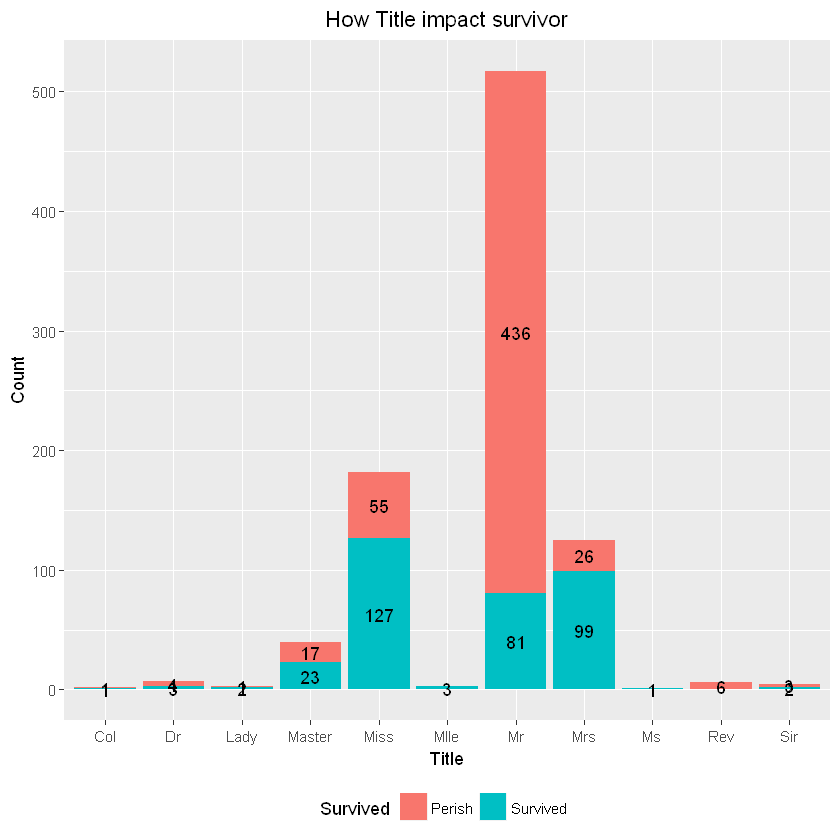

In [10]:
# extract titile from name
data$Title <- sapply(data$Name, FUN=function(x) {strsplit(x, split='[,.]')[[1]][2]})
data$Title <- sub(' ', '', data$Title)
data$Title[data$Title %in% c('Mme', 'Mlle')] <- 'Mlle'
data$Title[data$Title %in% c('Capt', 'Don', 'Major', 'Sir')] <- 'Sir'
data$Title[data$Title %in% c('Dona', 'Lady', 'the Countess', 'Jonkheer')] <- 'Lady'
data$Title <- factor(data$Title)
# statistics different titiles
ggplot(data = data[1:nrow(train),], mapping = aes(x = Title, y = ..count.., fill=Survived)) + 
  geom_bar(stat = "count", position='stack') + 
  xlab('Title') + 
  ylab('Count') + 
  ggtitle('How Title impact survivor') + 
  scale_fill_discrete(name="Survived", breaks=c(0, 1), labels=c("Perish", "Survived")) + 
  geom_text(stat = "count", aes(label = ..count..), position=position_stack(vjust = 0.5)) +
  theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")

** It could find most Famel survivied.
According to WOE AND IV, it could find IV of Pclass IS 1.520702 AND "Highly Predictive" **

In [11]:
WOETable(X=data$Title[1:nrow(train)], Y=data$Survived[1:nrow(train)])

CAT,GOODS,BADS,TOTAL,PCT_G,PCT_B,WOE,IV
Col,1,1,2,0.002873563,0.001808318,0.46315552,4.933741e-04
Dr,3,4,7,0.008620690,0.007233273,0.17547345,2.434548e-04
Lady,2,1,3,0.005747126,0.001808318,1.15630270,4.554455e-03
Master,23,17,40,0.066091954,0.030741410,0.76543639,2.705859e-02
Miss,127,55,182,0.364942529,0.099457505,1.30000942,3.451330e-01
Mlle,3,3,3,0.008620690,0.005424955,0.46315552,1.480122e-03
Mr,81,436,517,0.232758621,0.788426763,-1.22003757,6.779360e-01
Mrs,99,26,125,0.284482759,0.047016275,1.80017883,4.274821e-01
Ms,1,1,1,0.002873563,0.001808318,0.46315552,4.933741e-04
Rev,6,6,6,0.017241379,0.010849910,0.46315552,2.960244e-03


In [12]:
IV(X=data$Title[1:nrow(train)], Y=data$Survived[1:nrow(train)])

[1] 1.487853
attr(,"howgood")
[1] "Highly Predictive"

# ** For Sex, find relationship between survived and sex of people **

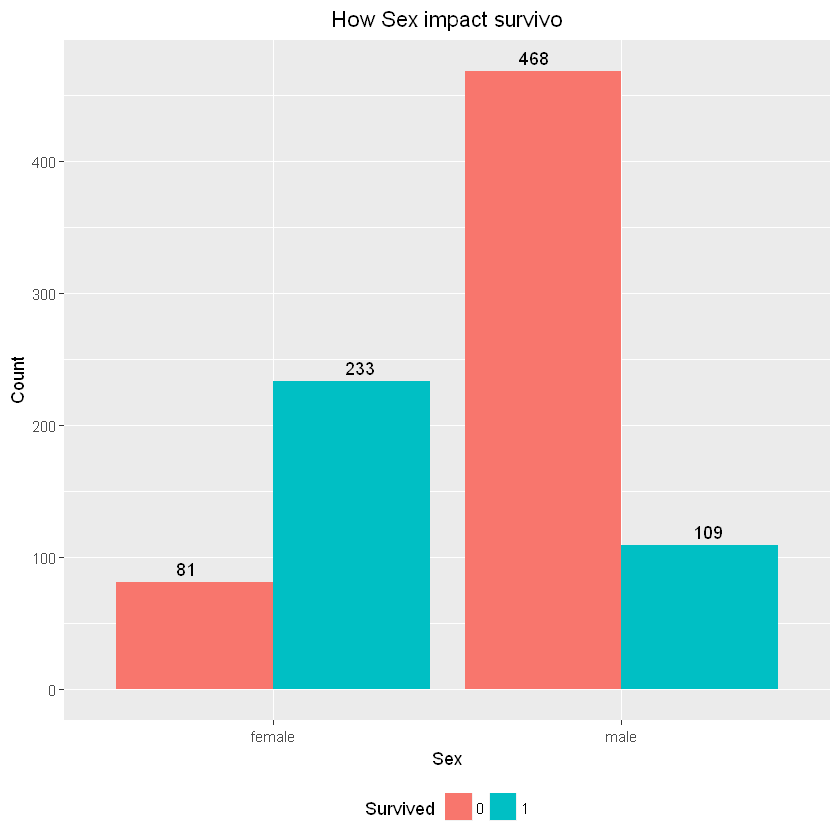

In [13]:
data$Sex <- as.factor(data$Sex)
ggplot(data = data[1:nrow(train),], mapping = aes(x = Sex, y = ..count.., fill=Survived)) + 
  geom_bar(stat = 'count', position='dodge') + 
  xlab('Sex') + 
  ylab('Count') + 
  ggtitle('How Sex impact survivo') + 
  geom_text(stat = "count", aes(label = ..count..), position=position_dodge(width=1), , vjust=-0.5) + 
  theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")

** It could find most femal servived because "Let the womens and the children go first please." 
According to WOE AND IV, it could find IV of Pclass IS 1.34 AND "Highly Predictive" **

In [14]:
WOETable(X=data$Sex[1:nrow(train)], Y=data$Survived[1:nrow(train)])

CAT,GOODS,BADS,TOTAL,PCT_G,PCT_B,WOE,IV
female,233,81,314,0.6812865,0.147541,1.5298770,0.8165651
male,109,468,577,0.3187135,0.852459,-0.9838327,0.5251163


In [15]:
IV(X=data$Sex[1:nrow(train)], Y=data$Survived[1:nrow(train)])

[1] 1.341681
attr(,"howgood")
[1] "Highly Predictive"

# ** For Age, find relationship between survived and age of people **

Warning message:
"Ignoring unknown aesthetics: label"

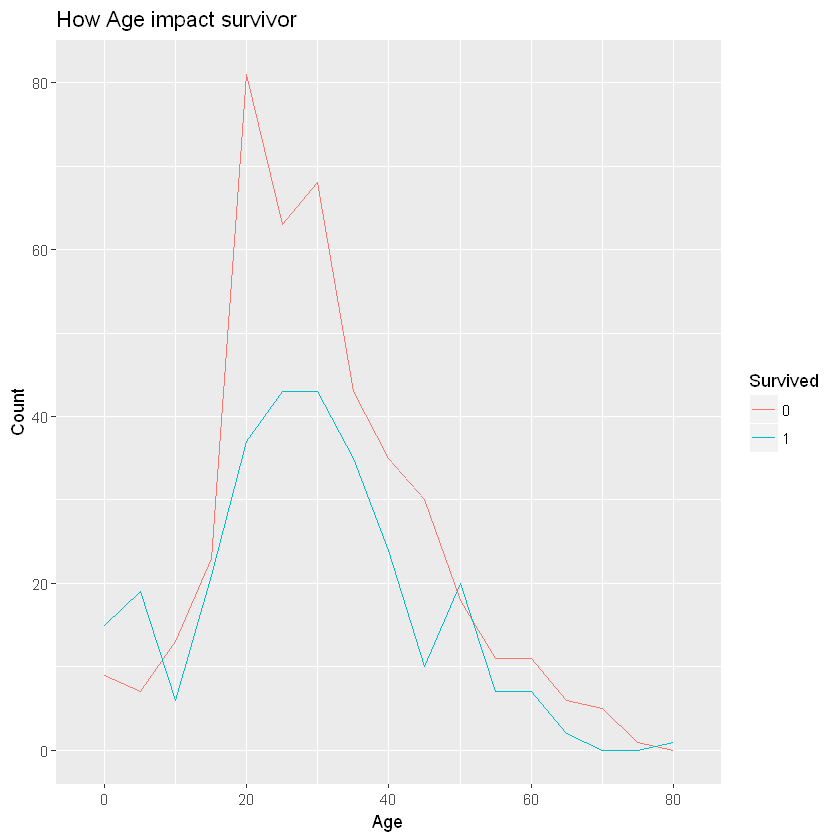

In [16]:
ggplot(data = data[(!is.na(data$Age)) & row(data[, 'Age']) <= 891, ], aes(x = Age, color=Survived)) + 
  geom_line(aes(label=..count..), stat = 'bin', binwidth=5)  + 
  labs(title = "How Age impact survivor", x = "Age", y = "Count", fill = "Survived")

** It could find survivied people higher than died for children **

# ** For SibSp, find relationship between survived and relative number **

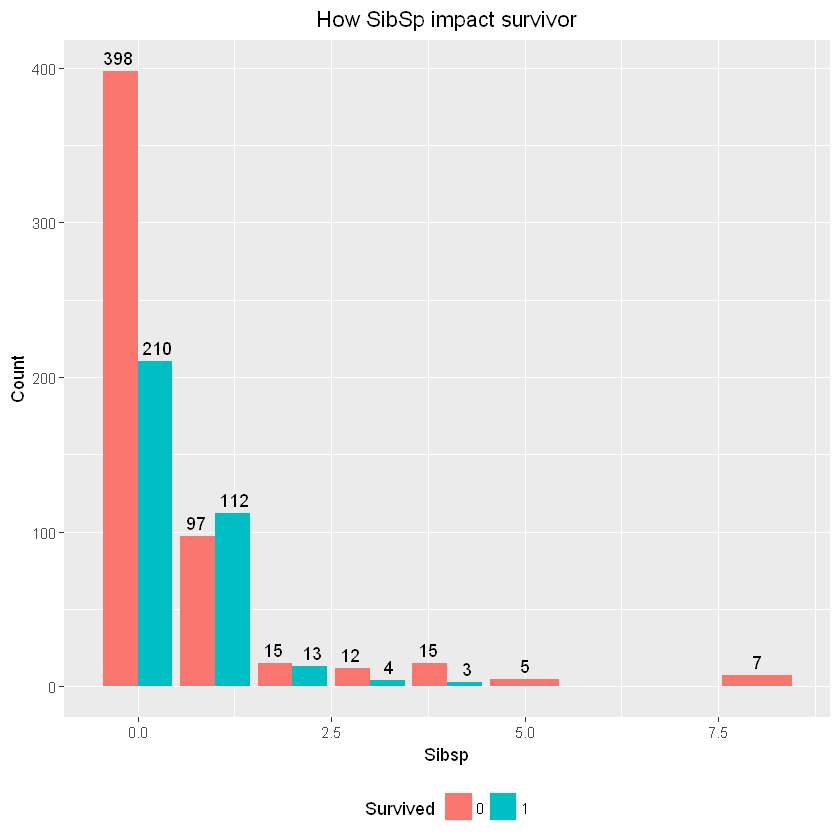

In [17]:
ggplot(data = data[1:nrow(train),], mapping = aes(x = SibSp, y = ..count.., fill=Survived)) + 
  geom_bar(stat = 'count', position='dodge') + 
  labs(title = "How SibSp impact survivor", x = "Sibsp", y = "Count", fill = "Survived") + 
  geom_text(stat = "count", aes(label = ..count..), position=position_dodge(width=1), , vjust=-0.5) + 
  theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")

**
According to WOE AND IV, it could find IV of Pclass IS 0.144 AND "Highly Predictive" **

In [18]:
WOETable(X=as.factor(data$SibSp[1:nrow(train)]), Y=data$Survived[1:nrow(train)])

CAT,GOODS,BADS,TOTAL,PCT_G,PCT_B,WOE,IV
0,210,398,608,0.593220339,0.724954463,-0.2005429,0.026418349
1,112,97,209,0.316384181,0.176684882,0.5825894,0.081387334
2,13,15,28,0.036723164,0.027322404,0.2957007,0.002779811
3,4,12,16,0.011299435,0.021857923,-0.6598108,0.006966604
4,3,15,18,0.008474576,0.027322404,-1.1706364,0.022063953
5,5,5,5,0.014124294,0.009107468,0.4388015,0.002201391
8,7,7,7,0.019774011,0.012750455,0.4388015,0.003081947


In [19]:
IV(X=as.factor(data$SibSp[1:nrow(train)]), Y=data$Survived[1:nrow(train)])

[1] 0.1448994
attr(,"howgood")
[1] "Highly Predictive"

# ** For Patch, find relationship between survived and parents and childs **

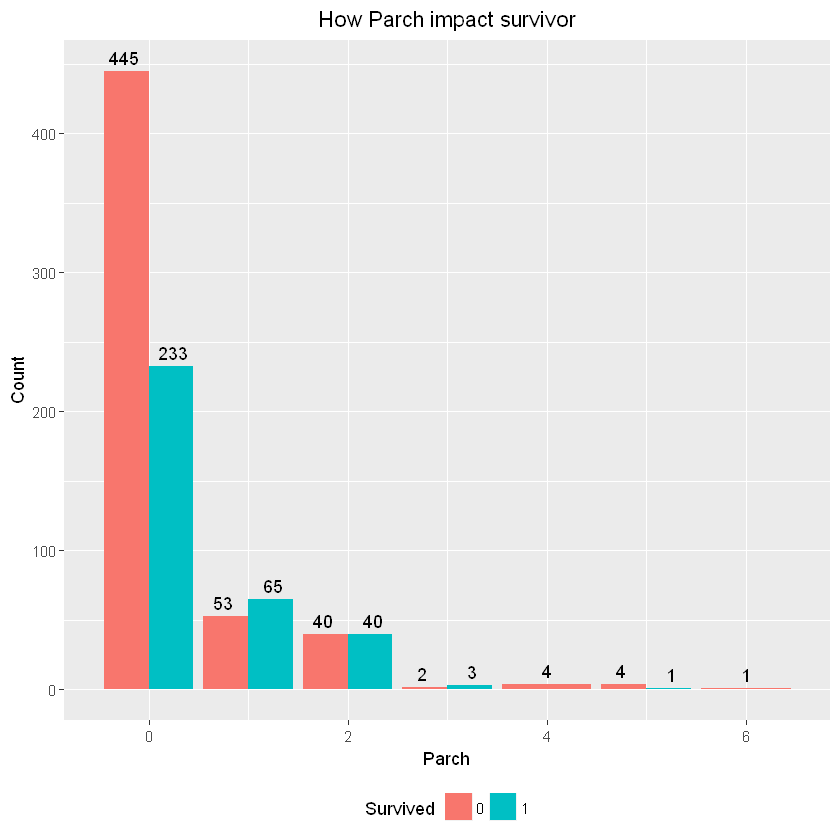

In [20]:
ggplot(data = data[1:nrow(train),], mapping = aes(x = Parch, y = ..count.., fill=Survived)) + 
  geom_bar(stat = 'count', position='dodge') + 
  labs(title = "How Parch impact survivor", x = "Parch", y = "Count", fill = "Survived") + 
  geom_text(stat = "count", aes(label = ..count..), position=position_dodge(width=1), , vjust=-0.5) + 
  theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")

**According to WOE AND IV, it could find IV of Pclass IS 0.116 AND "Highly Predictive" **

In [21]:
WOETable(X=as.factor(data$Parch[1:nrow(train)]), Y=data$Survived[1:nrow(train)])

CAT,GOODS,BADS,TOTAL,PCT_G,PCT_B,WOE,IV
0,233,445,678,0.671469741,0.810564663,-0.1882622,0.026186312
1,65,53,118,0.187319885,0.096539162,0.6628690,0.060175728
2,40,40,80,0.115273775,0.072859745,0.4587737,0.019458440
3,3,2,5,0.008645533,0.003642987,0.8642388,0.004323394
4,4,4,4,0.011527378,0.007285974,0.4587737,0.001945844
5,1,4,5,0.002881844,0.007285974,-0.9275207,0.004084922
6,1,1,1,0.002881844,0.001821494,0.4587737,0.000486461


In [22]:
IV(X=as.factor(data$Parch[1:nrow(train)]), Y=data$Survived[1:nrow(train)])

[1] 0.1166611
attr(,"howgood")
[1] "Highly Predictive"

# ** For Patch and SibSp we could extrct new feature family size, find relationship between survived and familiy size **

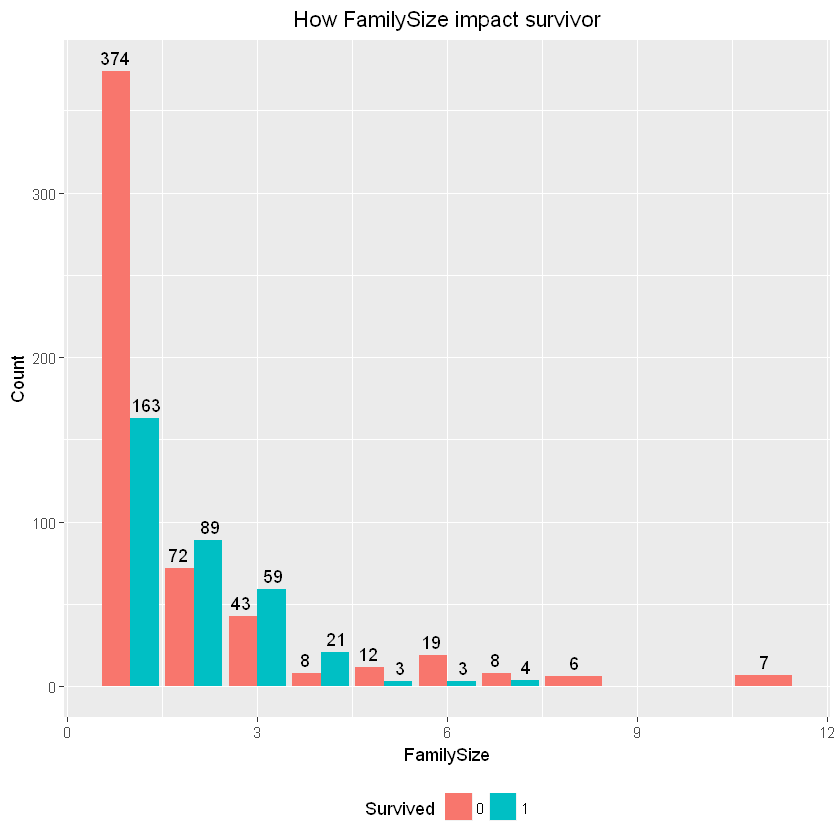

In [23]:
data$FamilySize <- data$SibSp + data$Parch + 1
ggplot(data = data[1:nrow(train),], mapping = aes(x = FamilySize, y = ..count.., fill=Survived)) + 
  geom_bar(stat = 'count', position='dodge') + 
  xlab('FamilySize') + 
  ylab('Count') + 
  ggtitle('How FamilySize impact survivor') + 
  geom_text(stat = "count", aes(label = ..count..), position=position_dodge(width=1), , vjust=-0.5) + 
  theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")

**According to WOE AND IV, it could find IV of Pclass IS 0.3479 AND "Highly Predictive". And because the IV is higher than priours fatures which means this new features could be a reasonable new feature **

In [24]:
WOETable(X=as.factor(data$FamilySize[1:nrow(train)]), Y=data$Survived[1:nrow(train)])

CAT,GOODS,BADS,TOTAL,PCT_G,PCT_B,WOE,IV
1,163,374,537,0.459154930,0.68123862,-0.3945249,0.0876175539
2,89,72,161,0.250704225,0.13114754,0.6479509,0.0774668616
3,59,43,102,0.166197183,0.07832423,0.7523180,0.0661084057
4,21,8,29,0.059154930,0.01457195,1.4010615,0.0624634998
5,3,12,15,0.008450704,0.02185792,-0.9503137,0.0127410643
6,3,19,22,0.008450704,0.03460838,-1.4098460,0.0368782940
7,4,8,12,0.011267606,0.01457195,-0.2571665,0.0008497665
8,6,6,6,0.016901408,0.01092896,0.4359807,0.0026038712
11,7,7,7,0.019718310,0.01275046,0.4359807,0.0030378497


In [25]:
IV(X=as.factor(data$FamilySize[1:nrow(train)]), Y=data$Survived[1:nrow(train)])

[1] 0.3497672
attr(,"howgood")
[1] "Highly Predictive"

# ** For Ticket, find relationship between survived and ticket number **

In [26]:
ticket.count <- aggregate(data$Ticket, by = list(data$Ticket), function(x) sum(!is.na(x)))

** It's hard to use ticket id find a relationship, suppose same id people is family, they could survived or died togather.**

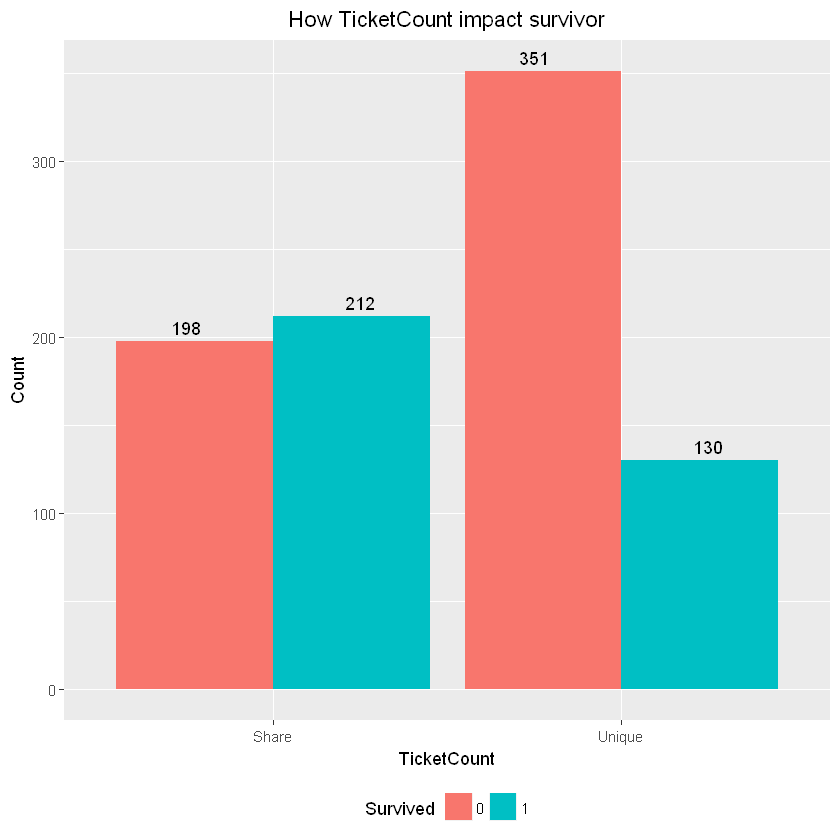

In [27]:
data$TicketCount <- apply(data, 1, function(x) ticket.count[which(ticket.count[, 1] == x['Ticket']), 2])
data$TicketCount <- factor(sapply(data$TicketCount, function(x) ifelse(x > 1, 'Share', 'Unique')))
ggplot(data = data[1:nrow(train),], mapping = aes(x = TicketCount, y = ..count.., fill=Survived)) + 
  geom_bar(stat = 'count', position='dodge') + 
  xlab('TicketCount') + 
  ylab('Count') + 
  ggtitle('How TicketCount impact survivor') + 
  geom_text(stat = "count", aes(label = ..count..), position=position_dodge(width=1), , vjust=-0.5) + 
  theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")

**According to WOE AND IV, it could find IV of Pclass IS 0.2751 AND "Highly Predictive".**

In [28]:
WOETable(X=data$TicketCount[1:nrow(train)], Y=data$Survived[1:nrow(train)])

CAT,GOODS,BADS,TOTAL,PCT_G,PCT_B,WOE,IV
Share,212,198,410,0.619883,0.3606557,0.5416069,0.1403993
Unique,130,351,481,0.380117,0.6393443,-0.5199641,0.1347889


In [29]:
IV(X=data$TicketCount[1:nrow(train)], Y=data$Survived[1:nrow(train)])

[1] 0.2751882
attr(,"howgood")
[1] "Highly Predictive"

# ** For Fare, find relationship between survived and ticket fee **

Warning message:
"Ignoring unknown aesthetics: label"

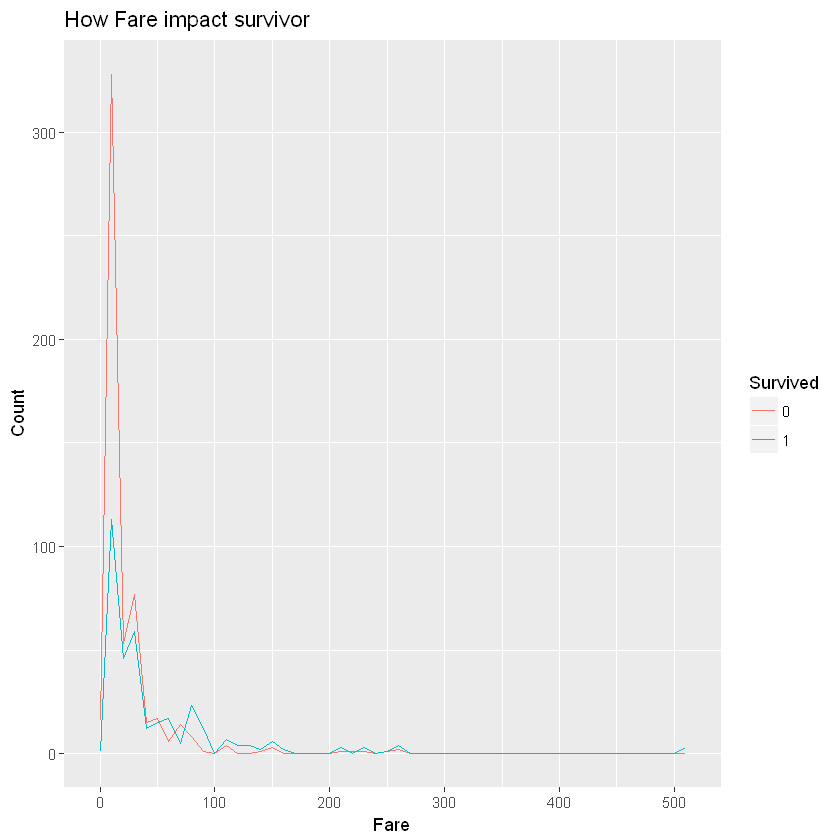

In [30]:
ggplot(data = data[(!is.na(data$Fare)) & row(data[, 'Fare']) <= 891, ], aes(x = Fare, color=Survived)) + 
  geom_line(aes(label=..count..), stat = 'bin', binwidth=10)  + 
  labs(title = "How Fare impact survivor", x = "Fare", y = "Count", fill = "Survived")

# ** For Cabin, find relationship between survived and Cabins **

** supoose the capital number of Cabins is the room id **

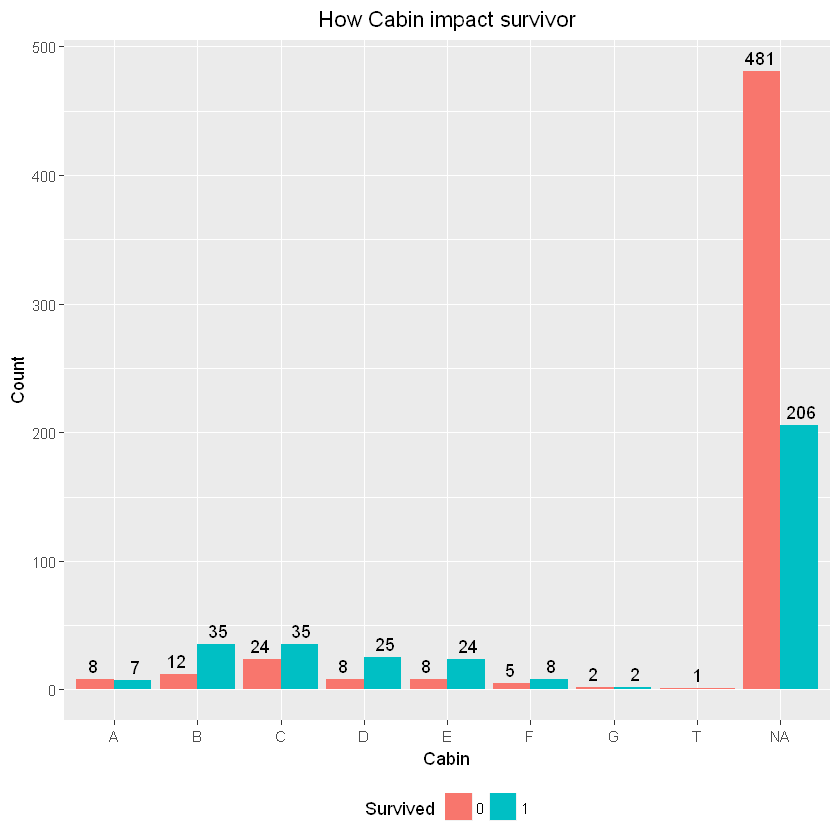

In [31]:
ggplot(data[1:nrow(train), ], mapping = aes(x = as.factor(sapply(data$Cabin[1:nrow(train)], function(x) str_sub(x, start = 1, end = 1))), y = ..count.., fill = Survived)) +
  geom_bar(stat = 'count', position='dodge') + 
  xlab('Cabin') +
  ylab('Count') +
  ggtitle('How Cabin impact survivor') +
  geom_text(stat = "count", aes(label = ..count..), position=position_dodge(width=1), , vjust=-0.5) + 
  theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")

**According to WOE AND IV, it could find IV of Pclass IS 0.18665 AND "Highly Predictive".**

In [32]:
data$Cabin <- sapply(data$Cabin, function(x) str_sub(x, start = 1, end = 1))
WOETable(X=as.factor(data$Cabin[1:nrow(train)]), Y=data$Survived[1:nrow(train)])

CAT,GOODS,BADS,TOTAL,PCT_G,PCT_B,WOE,IV
A,7,8,15,0.05109489,0.11764706,-0.8340046,0.055504815
B,35,12,47,0.25547445,0.17647059,0.3699682,0.029228917
C,35,24,59,0.25547445,0.35294118,-0.3231790,0.031499197
D,25,8,33,0.18248175,0.11764706,0.4389611,0.028459906
E,24,8,32,0.17518248,0.11764706,0.3981391,0.022907100
F,8,5,13,0.05839416,0.07352941,-0.2304696,0.003488215
G,2,2,4,0.01459854,0.02941176,-0.7004732,0.010376267
T,1,1,1,0.00729927,0.01470588,-0.7004732,0.005188134


In [33]:
IV(X=as.factor(data$Cabin[1:nrow(train)]), Y=data$Survived[1:nrow(train)])

[1] 0.1866526
attr(,"howgood")
[1] "Highly Predictive"

# ** For Embarked, find relationship between survived and ports **

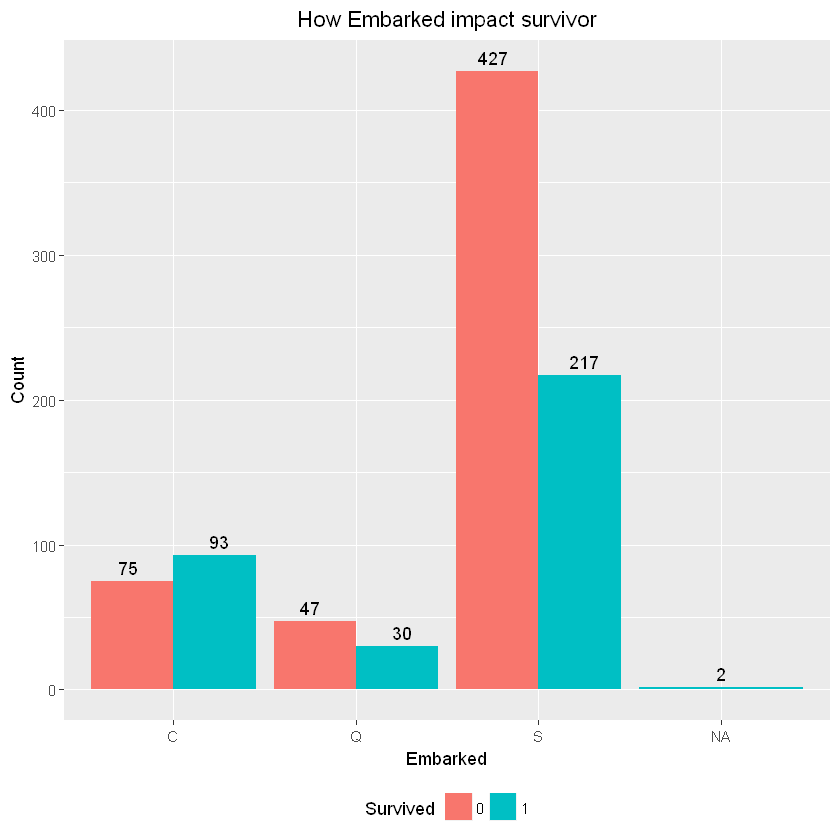

In [34]:
ggplot(data[1:nrow(train), ], mapping = aes(x = Embarked, y = ..count.., fill = Survived)) +
  geom_bar(stat = 'count', position='dodge') + 
  xlab('Embarked') +
  ylab('Count') +
  ggtitle('How Embarked impact survivor') +
  geom_text(stat = "count", aes(label = ..count..), position=position_dodge(width=1), , vjust=-0.5) + 
  theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")

**According to WOE AND IV, it could find IV of Pclass IS 0.1227 AND "Highly Predictive".**

In [35]:
WOETable(X=as.factor(data$Embarked[1:nrow(train)]), Y=data$Survived[1:nrow(train)])

CAT,GOODS,BADS,TOTAL,PCT_G,PCT_B,WOE,IV
C,93,75,168,0.27352941,0.1366120,0.6942642,9.505684e-02
Q,30,47,77,0.08823529,0.0856102,0.0302026,7.928467e-05
S,217,427,644,0.63823529,0.7777778,-0.1977338,2.759227e-02


In [36]:
IV(X=as.factor(data$Embarked[1:nrow(train)]), Y=data$Survived[1:nrow(train)])

[1] 0.1227284
attr(,"howgood")
[1] "Highly Predictive"

# stpe 3: Fill the missing value

** list all missing value **

In [37]:
attach(data)
  missing <- list(Pclass=nrow(data[is.na(Pclass), ]))
  missing$Name <- nrow(data[is.na(Name), ])
  missing$Sex <- nrow(data[is.na(Sex), ])
  missing$Age <- nrow(data[is.na(Age), ])
  missing$SibSp <- nrow(data[is.na(SibSp), ])
  missing$Parch <- nrow(data[is.na(Parch), ])
  missing$Ticket <- nrow(data[is.na(Ticket), ])
  missing$Fare <- nrow(data[is.na(Fare), ])
  missing$Cabin <- nrow(data[is.na(Cabin), ])
  missing$Embarked <- nrow(data[is.na(Embarked), ])
  for (name in names(missing)) {
    if (missing[[name]][1] > 0) {
      print(paste('', name, ' miss ', missing[[name]][1], ' values', sep = ''))
    }
  }
detach(data)

[1] "Age miss 263 values"
[1] "Fare miss 1 values"
[1] "Cabin miss 1014 values"
[1] "Embarked miss 2 values"


# For age, predict the age for missing value bacause the missing value is too much

In [38]:
# generate model by other features
age.model <- rpart(Age ~ Pclass + Sex + SibSp + Parch + Fare + Embarked + Title + FamilySize, data=data[!is.na(data$Age), ], method='anova')
# predict the missing value of age
data$Age[is.na(data$Age)] <- predict(age.model, data[is.na(data$Age), ])

# For Embarked, using median value to fill because only 2 missing value

In [39]:
data[is.na(data$Embarked), c('PassengerId', 'Pclass', 'Fare', 'Embarked')]

PassengerId,Pclass,Fare,Embarked
62,1,80,NA
830,1,80,NA


** 2 missing value is class 1 and Fare 80**

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

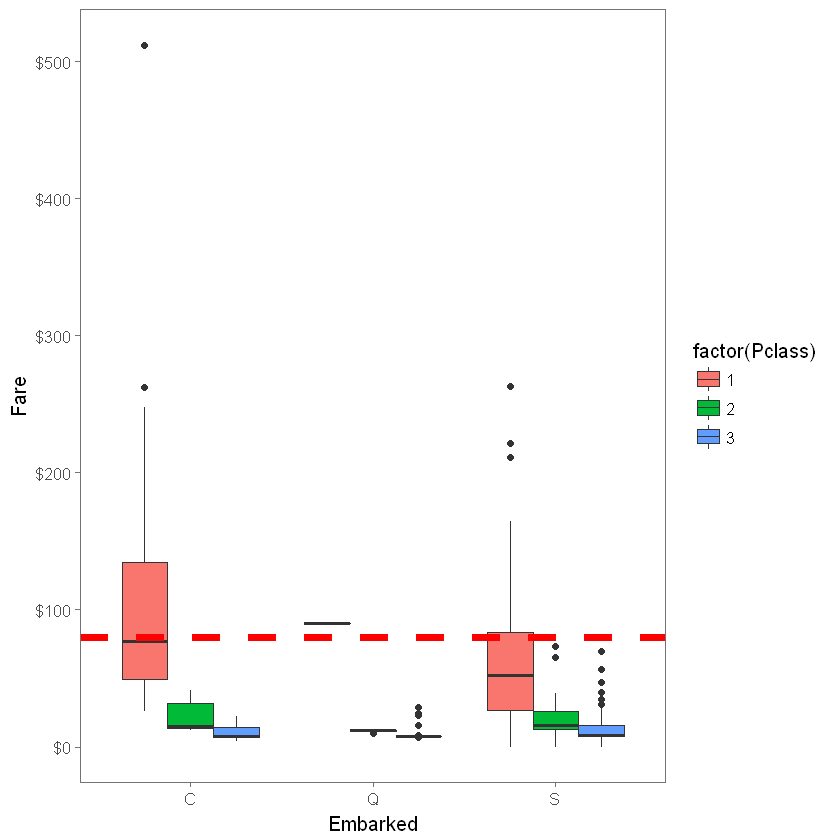

In [40]:
ggplot(data[!is.na(data$Embarked),], aes(x=Embarked, y=Fare, fill=factor(Pclass))) +
  geom_boxplot() +
  geom_hline(aes(yintercept=80), color='red', linetype='dashed', lwd=2) +
  scale_y_continuous(labels=dollar_format()) + theme_few()

** It could find Embarked-C has midian value of class 1 and Fare 80, therefore fill missing value by C**

In [41]:
data$Embarked[is.na(data$Embarked)] <- 'C'
data$Embarked <- as.factor(data$Embarked)

# For Fare, using median value to fill because only 1 missing value

In [42]:
data$Fare[is.na(data$Fare)] <- median(data$Fare, na.rm=TRUE)

# For Cabin, too much missing value and it's hard to predict it by other features and the iv of NA is high, therefore set all missing cabin with a charater X. 

In [43]:
data$Cabin <- as.factor(sapply(data$Cabin, function(x) ifelse(is.na(x), 'X', str_sub(x, start = 1, end = 1))))

# step 4: Train the model

In [44]:
set.seed(415)
model <- cforest(Survived ~ Pclass + Title + Sex + Age + SibSp + Parch + FamilySize + TicketCount + Fare + Cabin + Embarked, data = data[train.row, ], controls=cforest_unbiased(ntree=2000, mtry=3))

# step 5: cross validation

** In this project, using all data for traning and pick 30% random data for testing**

In [45]:
cv.summarize <- function(data.true, data.predict) {
  print(paste('Recall:', Recall(data.true, data.predict)))
  print(paste('Precision:', Precision(data.true, data.predict)))
  print(paste('Accuracy:', Accuracy(data.predict, data.true)))
  print(paste('AUC:', AUC(data.predict, data.true)))
}
set.seed(415)
cv.test.sample <- sample(1:nrow(train), as.integer(0.3 * nrow(train)), replace = TRUE)
cv.test <- data[cv.test.sample,]
cv.prediction <- predict(model, cv.test, OOB=TRUE, type = "response")
cv.summarize(cv.test$Survived, cv.prediction)

[1] "Recall: 0.947976878612717"
[1] "Precision: 0.841025641025641"
[1] "Accuracy: 0.850187265917603"
[1] "AUC: 0.809094822285082"


In [46]:
predict.result <- predict(model, data[(1+nrow(train)):(nrow(data)), ], OOB=TRUE, type = "response")
output <- data.frame(PassengerId = test$PassengerId, Survived = predict.result)
#write.csv(output, file = "jz1g17_Titanic_submission_R_1.csv", row.names = FALSE)

** Score in Kaggle: 0.80382**

# step 6: optimize

# ** remove the associated features SibSp and Parch because new feature FamilySize has higher IV **

In [47]:
set.seed(415)
model <- cforest(Survived ~ Pclass + Title + Sex + Age + FamilySize + TicketCount + Fare + Cabin + Embarked, data = data[train.row, ], controls=cforest_unbiased(ntree=2000, mtry=3))
predict.result <- predict(model, data[test.row, ], OOB=TRUE, type = "response")
submit <- data.frame(PassengerId = test$PassengerId, Survived = predict.result)
#write.csv(submit, file = "jz1g17_Titanic_submission_R_2.csv", row.names = FALSE)

** Score in Kaggle: 0.80382**

# ** remove the low IV feature Cabin**

In [48]:
set.seed(415)
model <- cforest(Survived ~ Pclass + Title + Sex + Age + FamilySize + TicketCount + Fare + Embarked, data = data[train.row, ], controls=cforest_unbiased(ntree=2000, mtry=3))
predict.result <- predict(model, data[test.row, ], OOB=TRUE, type = "response")
submit <- data.frame(PassengerId = test$PassengerId, Survived = predict.result)
#write.csv(submit, file = "jz1g17_Titanic_submission_R_3.csv", row.names = FALSE)

** Score in Kaggle: 0.80382**

# ** Add derive feature**

For name feature, title is one derive feature. 

The first name may has higher multiplicity, but the last name has lower multiplicity in west type name. Therefore the last name could be a new feature. People have the same last name could be family, they may all live or all died. In addition, for the last name only found once, they could not happen in train and test dataset at the sametime, therefore named the once last name to "small"

In [49]:
data$Surname <- sapply(data$Name, FUN=function(x) {strsplit(x, split='[,.]')[[1]][1]})
data$FamilyID <- paste(as.character(data$FamilySize), data$Surname, sep="")
data$FamilyID[data$FamilySize <= 2] <- 'Small'
# Delete erroneous family IDs
famIDs <- data.frame(table(data$FamilyID))
famIDs <- famIDs[famIDs$Freq <= 2,]
data$FamilyID[data$FamilyID %in% famIDs$Var1] <- 'Small'
# Convert to a factor
data$FamilyID <- factor(data$FamilyID)

In [50]:
set.seed(415)
model <- cforest(as.factor(Survived) ~ Pclass + Sex + Age + Fare + Embarked + Title + FamilySize + FamilyID + TicketCount, data = data[train.row, ], controls=cforest_unbiased(ntree=2000, mtry=3))
predict.result <- predict(model, data[test.row, ], OOB=TRUE, type = "response")
submit <- data.frame(PassengerId = test$PassengerId, Survived = predict.result)
#write.csv(submit, file = "jz1g17_Titanic_submission_R_4.csv", row.names = FALSE)

**Score in Kaggle: 0.82296**

# Fill embarked by most S, not C: it's just an attempt.

In [51]:
data$Embarked[c(62,830)] = "S"
data$Embarked <- factor(data$Embarked)

In [52]:
set.seed(415)
model <- cforest(as.factor(Survived) ~ Pclass + Sex + Age + Fare + Embarked + Title + FamilySize + FamilyID + TicketCount, data = data[train.row, ], controls=cforest_unbiased(ntree=2000, mtry=3))
predict.result <- predict(model, data[test.row, ], OOB=TRUE, type = "response")
submit <- data.frame(PassengerId = test$PassengerId, Survived = predict.result)
#write.csv(submit, file = "jz1g17_Titanic_submission_R_5.csv", row.names = FALSE)

** Score in Kaggle: 0.82296 **